# Final Project: Wine Quality Prediction

## Goals and Methods
The analysis is to build a multiple linear regression model on a wine quality dataset. The dataset include parameters such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. The goal of this analysis is to find out if we can predict the quality of the wine based on the parameters mentioned above. If so, what parameters are more important in the prediction.

## Dataset Description
The dataset is acquired from UC Irvine Machine Learning Repository. The link to the dataset can be found here: https://archive.ics.uci.edu/dataset/186/wine+quality. Only the red wine dataset was used for this analysis.

Thed dataset has approximately 1600 entries and 12 columns. The names of the columsn are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. Quality is a categorical parameter, whereas all the other parameters are continuous values of either integers or floats. 



## Data Cleaning

The dataset is relatively clean.



In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn.objects as so

In [2]:
df = pd.read_csv("red_quality.csv")
#The data cleaning is to replace the spaces in column names with "_" for cleaningness of the data.
df = df.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid":"citric_acid", 
                   "residual sugar":"residual_sugar", "free sulfur dioxide":"free_sulfur_dioxide", 
                  "total sulfur dioxide": "total_sulfur_dioxide"})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

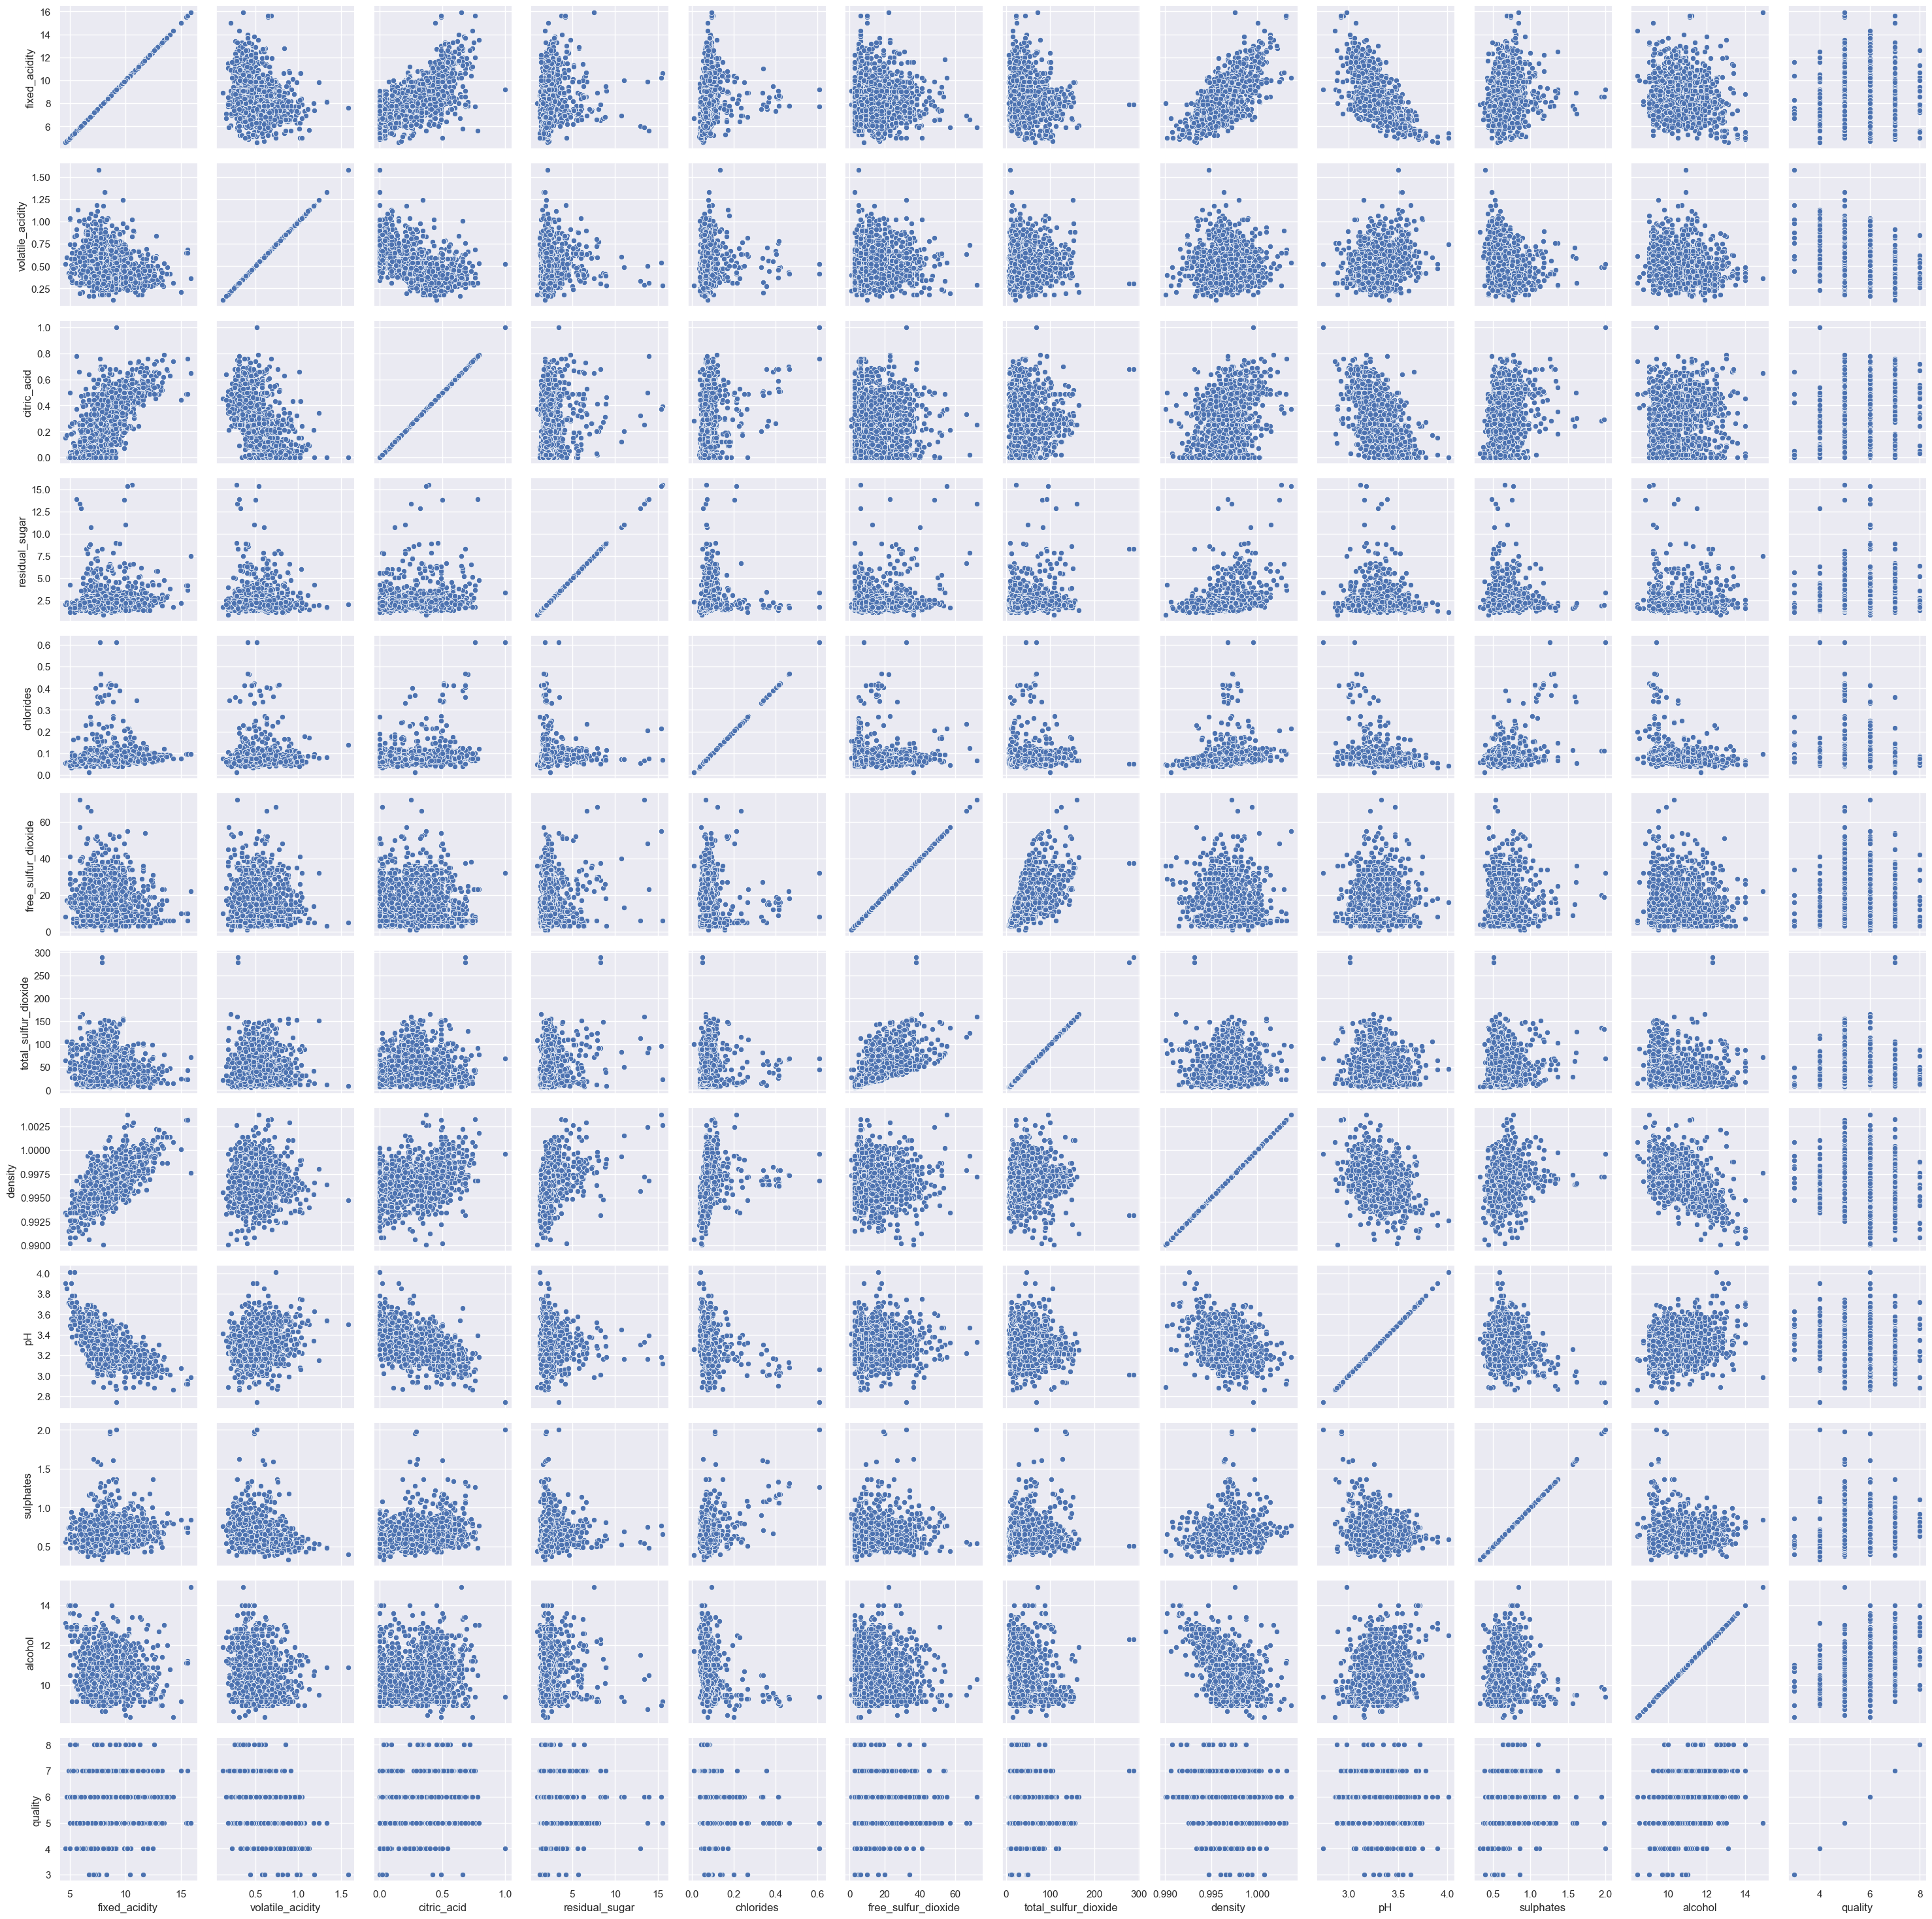

In [3]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

From the pairplot, it looks like the quality is not directly related with one parameter. It is a combination of the parameters. Therefore, a multiple linear regression model is chosen. 

Looking at the quality plots, it looks like for the wines that has either very high quality or very low quality, their other parameters' range seem to be smaller than the wines that has middle-rated quality. However, this could also be due to the number of the very high and very low quality wines are smaller than that for the middle-rated quality wines. The distribution of the wine quality data is shown in the figure below.

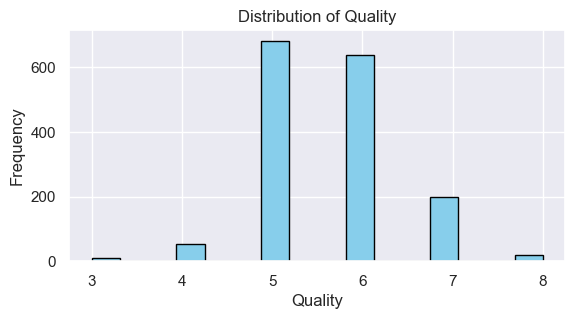

In [4]:
plt.figure().set_figheight(3)
plt.hist(df.quality, bins=16, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Quality')

# Display the plot
plt.show()

In [5]:
#find out the correlationship between the parameters
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

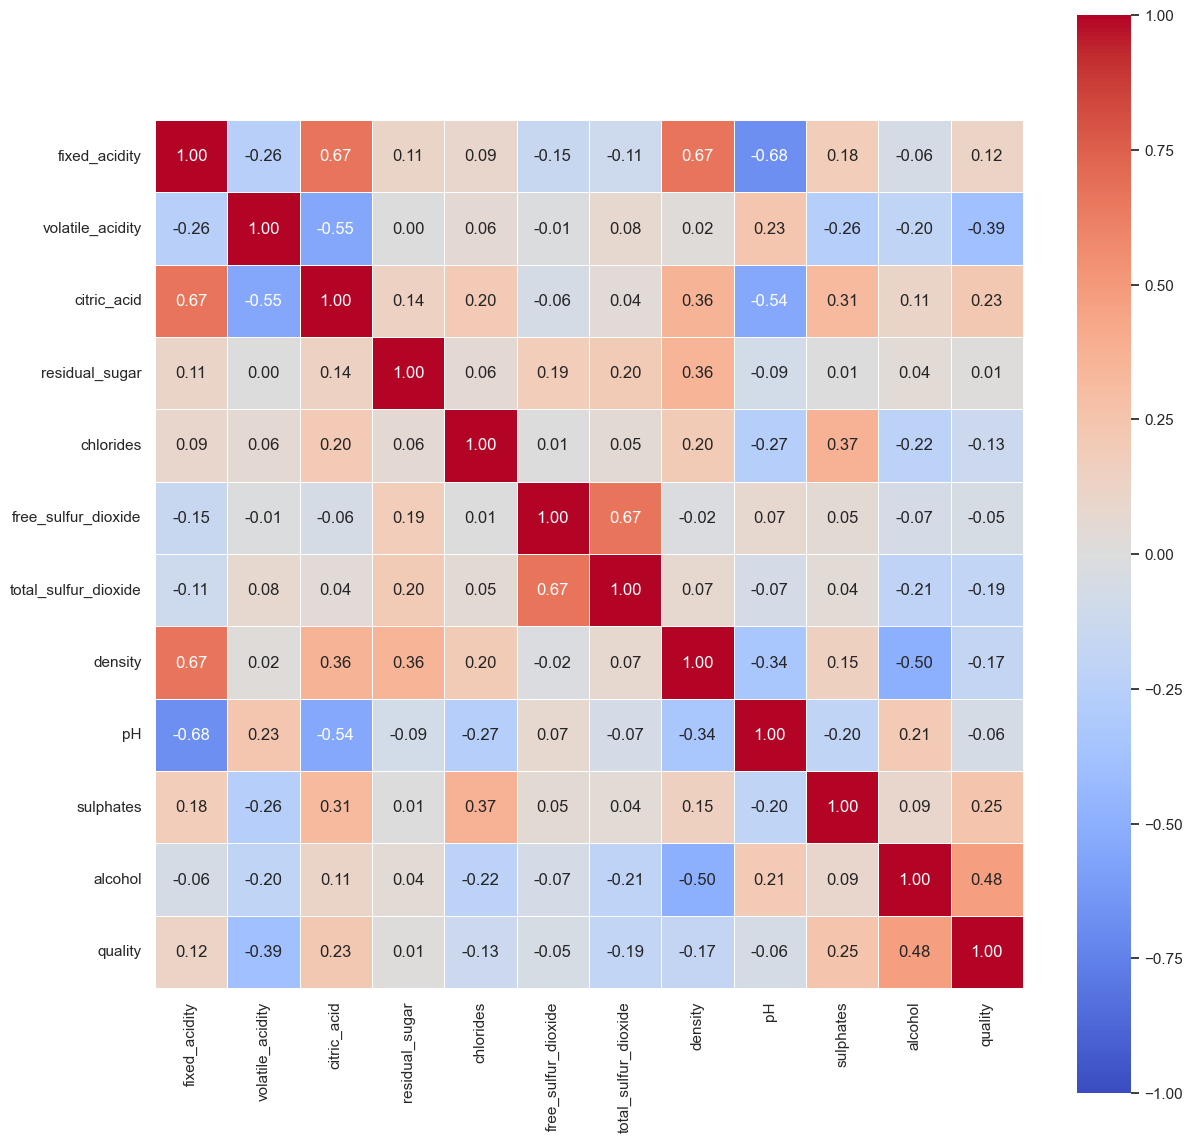

In [6]:
#do a heatmap
sns.set (rc = {'figure.figsize':(14, 14)})
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           cmap = "coolwarm",
           square = True,
           annot = True, fmt = ".2f",
           linewidth = 0.5
           )


From the plots above, it looks like the quality of the wine is mostly correlated with alcohol, volatile acidity, and total sulphates. 

## Models

In [7]:
#Split the data into training data and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(
    df, train_size=125, random_state = 0)
train_data = X_train
test_data = X_test

In [8]:
best = ['',0]
allowed_factors = ["alcohol", "volatile_acidity",  "fixed_acidity", "citric_acid", 
                   "residual_sugar", "free_sulfur_dioxide", 
                 "total_sulfur_dioxide"]
for p in allowed_factors:
    model  = smf.ols(formula='quality~'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

allowed_factors.remove(best[0])

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='quality~alcohol+'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

allowed_factors.remove(best[0])

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='quality~alcohol+volatile_acidity+'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='quality~alcohol+volatile_acidity+citric_acid+'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='quality~alcohol+volatile_acidity+citric_acid+ total_sulfur_dioxide+'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='quality~alcohol+volatile_acidity+citric_acid+ total_sulfur_dioxide+ free_sulfur_dioxide+'+p, data=train_data).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

best: ['alcohol', 0.20668743046129745]
best: ['volatile_acidity', 0.3142845704226018]
best: ['citric_acid', 0.33238538117595917]
best: ['total_sulfur_dioxide', 0.33941642833950547]
best: ['free_sulfur_dioxide', 0.3453809347270025]
best: ['fixed_acidity', 0.34987994647757337]


From the rsquared graph above, it looks like the selecting the first 3 variables is good enough for the multi-linear regression. Adding additional variables don't seem to help much. 

In [9]:
model = smf.ols(formula='quality~alcohol + volatile_acidity + total_sulfur_dioxide', data=train_data).fit()

## Results and Analysis

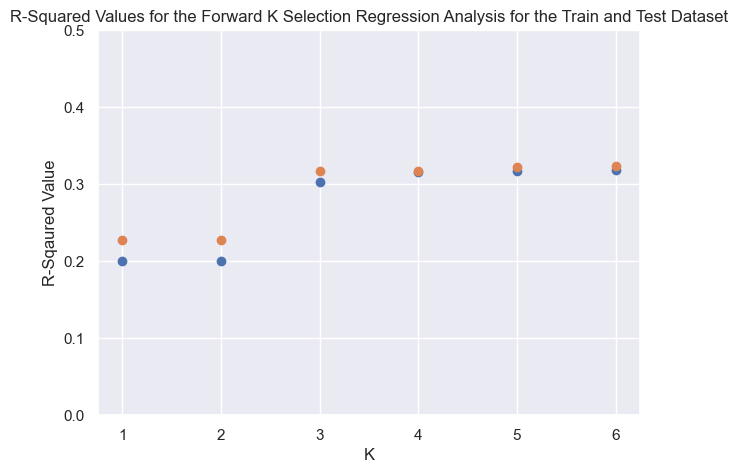

In [10]:
adjr2_train = []
adjr2_test = []
predictors = ["alcohol" , "volatile_acidity", "citric_acid", "total_sulfur_dioxide", "free_sulfur_dioxide", "fixed_acidity"]
form = 'quality ~ alcohol'

for predictor in predictors:
    model_train = smf.ols(formula=form, data=train_data).fit()
    model_test = smf.ols(formula=form, data=test_data).fit()
    adjr2_train.append(model_train.rsquared_adj)
    adjr2_test.append(model_test.rsquared_adj)
    form = form + "+ " + predictor

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array(adjr2_train)

plt.figure(figsize =(7, 5))
plt.ylim(0, 0.5)
plt.scatter(x, y)

x = np.array([1, 2, 3, 4, 5, 6])
y = adjr2_test
plt.ylim(0, 0.5)
plt.scatter(x, y)
plt.title("R-Squared Values for the Forward K Selection Regression Analysis for the Train and Test Dataset")
plt.ylabel("R-Sqaured Value")
plt.xlabel("K")
           

plt.show()

In [11]:
#Print modeled rsquared value
model.rsquared

0.323108991159592

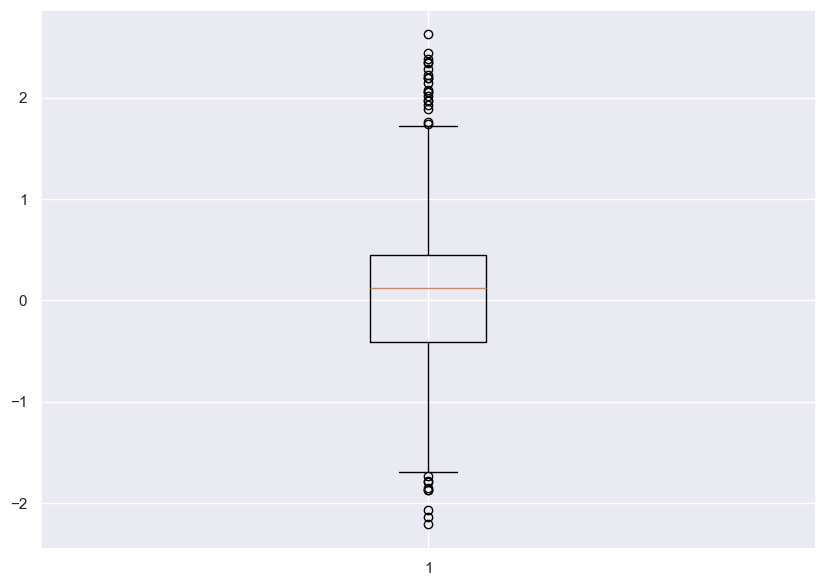

In [12]:
pred_quality = model.predict(test_data)
act_quality = test_data.quality
diff = pred_quality - act_quality

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(diff)

# show plot
plt.show()

The box plot above shows that the prediction works well with the test dataset. The predicted quality is within +/- 0.5 of the actual quality for 50% of the times, and within +/- 1.5 of the actual quality for the majority of the times. 

# Discission and Conclusion

The analysis shows that it's not clear that in this dataset, the quality of wine has a multiple linear relationship with the parameters such as alcohol, volatile acidity, and total sulfur dioxide. The modeled rsquare is not large enough to make this model a reliable prediction. However, a randomly split train and test dataset show that the predicted result is accurate 50% of the time, and is wihtin 1.5 of the actual quality for the majority of the times. 

Looking at the pairgrid plot for this dataset, it looks like the higher quality wine have a narrower range of values in each parameter, so are the lower quality wines. The mediacre wines have a relatively larger range of values in each parameter. If more time allowed, a potential way to look at it may be examining the spread of the data and correlate that with the quality, and from there, separate the middly scored wines, and then apply another layer of decision tree based on values to separate the higher scored and lower scored wines. 

